In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = "20191218-30min-PassengerCount.csv"
df = pd.read_csv(filename)

In [4]:
df

,Line,BoardingTime,PassengerCount
0,KC06,2019-12-18T00:00,1
1,LF09,2019-12-18T00:00,3
2,TC93,2019-12-18T00:00,1
3,TL94,2019-12-18T00:00,1
4,TL94,2019-12-18T01:00,1
...,...,...,...
1834,TL94,2019-12-19T00:00,14
1835,UC11,2019-12-19T00:00,5
1836,VF01,2019-12-19T00:00,5
1837,VL13A,2019-12-19T00:00,4


In [5]:
pd.unique(df["BoardingTime"])

array(['2019-12-18T00:00', '2019-12-18T01:00', '2019-12-18T03:30',
       '2019-12-18T05:30', '2019-12-18T06:00', '2019-12-18T06:30',
       '2019-12-18T07:00', '2019-12-18T07:30', '2019-12-18T08:00',
       '2019-12-18T08:30', '2019-12-18T09:00', '2019-12-18T09:30',
       '2019-12-18T10:00', '2019-12-18T10:30', '2019-12-18T11:00',
       '2019-12-18T11:30', '2019-12-18T12:00', '2019-12-18T12:30',
       '2019-12-18T13:00', '2019-12-18T13:30', '2019-12-18T14:00',
       '2019-12-18T14:30', '2019-12-18T15:00', '2019-12-18T15:30',
       '2019-12-18T16:00', '2019-12-18T16:30', '2019-12-18T17:00',
       '2019-12-18T17:30', '2019-12-18T18:00', '2019-12-18T18:30',
       '2019-12-18T19:00', '2019-12-18T19:30', '2019-12-18T20:00',
       '2019-12-18T20:30', '2019-12-18T21:00', '2019-12-18T21:30',
       '2019-12-18T22:00', '2019-12-18T22:30', '2019-12-18T23:00',
       '2019-12-18T23:30', '2019-12-19T00:00'], dtype=object)

In [6]:
def time_conv(d):
    return (datetime.strptime(d, '%Y-%m-%dT%H:%M'))

In [7]:
df['BoardingTime'] = df['BoardingTime'].apply(time_conv)

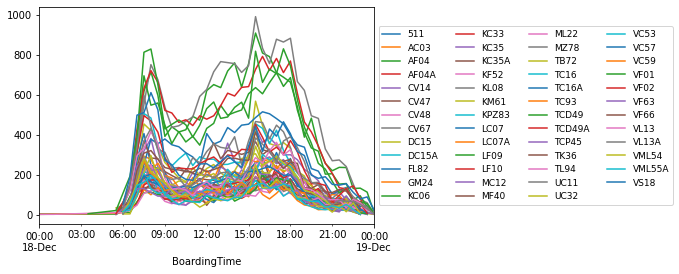

In [8]:
dfG = df.groupby("Line")
keys = list(dfG.groups.keys())
fig, ax = plt.subplots()
for key, grp in dfG:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=4,prop={'size': 9})

#ax.get_legend().remove()

In this graph each line shows different routes. Here, we can see that some lines are visibly have higher values than other lines. There is also some noticable trends, for example, there are noticable spikes between 6-9 am and 3-6 pm for all lines, which are rush hours.

In [9]:
dfmin = df.sort_values('PassengerCount', ascending=False).drop_duplicates(['BoardingTime'])
dfmin.sort_index(inplace=True)
print("Bus lines with maximum passengers for first 6 time points:")
print("----------------------------------------------------------")
print(dfmin.head())
print("----------------------------------------------------------")
print("Bus lines with maximum occurances in the total version of above list:")
print(dfmin['Line'].value_counts())

Bus lines with maximum passengers for first 6 time points:
----------------------------------------------------------
    Line        BoardingTime  PassengerCount
1   LF09 2019-12-18 00:00:00               3
4   TL94 2019-12-18 01:00:00               1
5   VF01 2019-12-18 03:30:00               4
8   DC15 2019-12-18 05:30:00              33
58  VF01 2019-12-18 06:00:00             107
----------------------------------------------------------
Bus lines with maximum occurances in the total version of above list:
KL08    22
KC06     6
VF01     6
LF10     2
VS18     2
DC15     1
LF09     1
TL94     1
Name: Line, dtype: int64


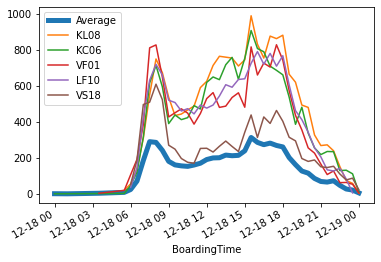

In [10]:
toP = dfmin['Line'].value_counts()[:5].reset_index()['index']
fig, ax = plt.subplots()
ax = df.groupby("BoardingTime").mean().plot(ax=ax, kind='line', label="average",linewidth=5.0)
for key in toP:
    dftp = dfG.get_group(key)
    ax = dftp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key)
L=plt.legend()
L.get_texts()[0].set_text('Average')

In [11]:
dfmax = df.sort_values('PassengerCount', ascending=True).drop_duplicates(['BoardingTime'])
dfmax.sort_index(inplace=True)
print("Bus lines with minimum recorded passengers for first 6 time points:")
print(dfmax.head())
print("-------------------------------------------------------------------")
print("Bus lines with maximum occurances in the total version of above list:")
print(dfmax['Line'].value_counts()[:8])

Bus lines with minimum recorded passengers for first 6 time points:
     Line        BoardingTime  PassengerCount
0    KC06 2019-12-18 00:00:00               1
4    TL94 2019-12-18 01:00:00               1
5    VF01 2019-12-18 03:30:00               4
16  TCP45 2019-12-18 05:30:00               1
25   CV48 2019-12-18 06:00:00               2
-------------------------------------------------------------------
Bus lines with maximum occurances in the total version of above list:
TC93     7
TL94     4
CV48     4
VML54    3
VC53     3
VF63     2
ML22     2
KF52     1
Name: Line, dtype: int64


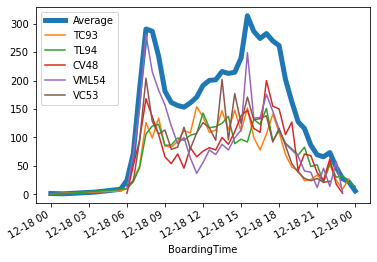

In [12]:
toP = dfmax['Line'].value_counts()[:5].reset_index()['index']
fig, ax = plt.subplots()
ax = df.groupby("BoardingTime").mean().plot(ax=ax, kind='line',linewidth=5.0)
for key in toP:
    dftp = dfG.get_group(key)
    ax = dftp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key)
L=plt.legend()
L.get_texts()[0].set_text('Average')

In [13]:
dfs = dfG.sum().sort_values("PassengerCount",ascending=False).reset_index()
dfs.index += 1 
print("Lines with most total passengers:")
print(dfs.head())
print("---------------------------------")
print("Lines with least total passengers:")
print(dfs.tail().iloc[::-1])

Lines with most total passengers:
   Line  PassengerCount
1  KL08           19400
2  KC06           17457
3  LF10           16795
4  VF01           16198
5  LF09           14692
---------------------------------
Lines with least total passengers:
     Line  PassengerCount
51   KC35            3023
50   TC93            3028
49   CV48            3050
48  TCD49            3053
47  KC35A            3058


From the last 3 results, we can say that the most busy line is KLo8 line. For the least busy, there are multiple lines with similarly low amount of passengers, and among them KC35 and TC93 are noticable.

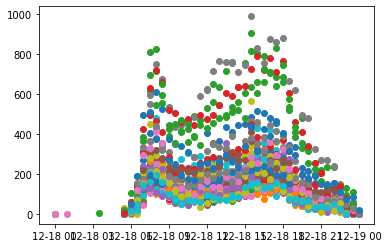

In [14]:
for name, group in dfG:
    plt.plot(group["BoardingTime"], group["PassengerCount"], marker="o", linestyle="", label=name)

In this scatter plot each line's data is shown in the same color. This plot can give us insight about the total scatter plot in which clustering will be done.

# Correlation of Bus Lines Passenger Data

In [15]:
start=1
for name,grp in dfG:
    temp = grp.copy().set_index("BoardingTime").drop(columns="Line").rename(columns={'PassengerCount': name})
    if start==1:
        dfTemp = temp
        start = 0
    else:
        dfTemp[name] = temp
dfTemp = dfTemp.fillna(0)
dfcorr = dfTemp.corr().values
print("Average of all correlation coefficients between bus lines:")
print(dfcorr.mean())
print("----------------------------------------------------------")
print("Standart deviation of all correlation coefficients between bus lines:")
print(dfcorr.std())

Average of all correlation coefficients between bus lines:
0.8366527543192129
----------------------------------------------------------
Standart deviation of all correlation coefficients between bus lines:
0.07748191596990504


From the correalation analysis, we can say that all of the bus lines have very similar characteristic. This result is in line with previous results and implies that for rasping the general pattern of the date, focusing on time would be heplful.

# k-means Clustering

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [17]:
def time_diff(a,date_min):
    res = (a-date_min).seconds/60 + (a-date_min).days*1440
    return(res)

Here, time is taken in units of minutes. This decision is important, as the unit of time affects distance calculations within k-means algorithm.

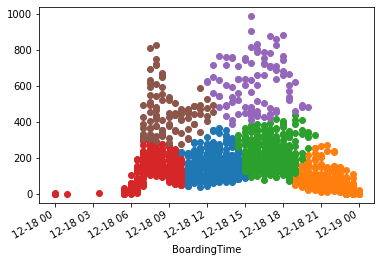

In [18]:
dfc = df.copy()
date_min = dfc.BoardingTime.min()
dfc['BoardingTime'] = df['BoardingTime'].apply(time_diff,date_min=date_min)
le = LabelEncoder()
dfc['Line'] = le.fit_transform(dfc['Line'])
#le.inverse_transform(dfc['Line'])
clusters = KMeans(n_clusters=6, random_state=0).fit_predict(dfc)
df2 = df.copy()
df2['cluster'] = clusters
dfG2 = df2.groupby("cluster")
fig, ax = plt.subplots()
for key, grp in dfG2:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
#plt.legend(ncol=5)
ax.get_legend().remove()

Here different clusters are shown in different colors. the number of clusters is choosen after trying a few numbers, and 6 was choosen as it shows the affect of time clearly. Some clusters (top two) are mainly differentiated from others based on their amount of passengers, but the rest (and the top two between themselves) are seperated are mainly seperated by time

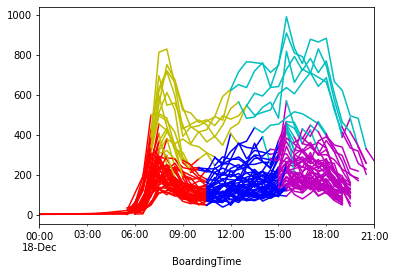

In [19]:
cm = {0:'b',1:'g',2:'m',3:'r',4:'c',5:'y',-1:'k'}
fig, ax = plt.subplots()
dfG = df2.groupby("Line")
for key in keys:
    this_key = key
    this_group = dfG.get_group(this_key).reset_index(drop=True)
    cuts = []
    for index, row in this_group.iterrows():
        cl = row['cluster']
        if len(cuts)==0:
            cuts.append(0)
            pcl = cl
            continue
        else:
            if cl!=pcl:
                cuts.append(index)
            pcl = cl
    prev = -1
    for c in cuts:
        if prev > -1:
            p = this_group[prev:c+1]
            ax = p.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount',c = cm[p.iloc[0].cluster])
            ax.get_legend().remove()
        prev = c

This graph shows the previous line graph, but differently this time the colors indicate the clusters instead of different lines. The colors are decided by the previous time point's cluster.

# Different Clustering Methods

## Another Partitional Clustering Method

In [20]:
from sklearn.cluster import MeanShift

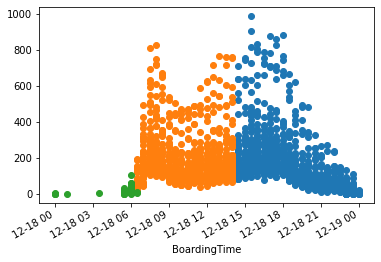

In [21]:
df2['cluster'] = MeanShift().fit_predict(dfc)
dfG3 = df2.groupby("cluster")
fig, ax = plt.subplots()
for key, grp in dfG3:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
ax.get_legend().remove()

Here, another partitional clustering method is used. In k-means method, there is a risk of dividing a cluster to multiple clusters and in this method, mean shift, this risk does not exist. The result obtained from this method shows the affect of time even more clearly.

## Hierarchical Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering

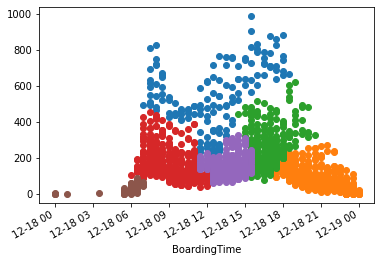

In [23]:
df2['c1'] = AgglomerativeClustering(n_clusters=6,linkage="ward").fit_predict(dfc)
dfG3 = df2.groupby("c1")
fig, ax = plt.subplots()
for key, grp in dfG3:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
ax.get_legend().remove()

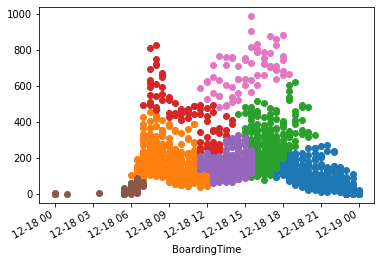

In [24]:
df2['c1'] = AgglomerativeClustering(n_clusters=7,linkage="ward").fit_predict(dfc)
dfG3 = df2.groupby("c1")
fig, ax = plt.subplots()
for key, grp in dfG3:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
ax.get_legend().remove()

Hierarchical methods are a different kind of clustering method, which uses an iterative method to either combine smaller clusters or divide a cluster to a given number. Because of their method, they are not especially inclined to spherical clusters (such as circles and spheres) which can be seen as an advantage compared to k-means method. Here we can see sharper dividers between clusters and we can also see a new cluster at the smaller values for the earlier hours. The other divider between top groups can again be seen if the number of clusters is changed to 7.

## DBSCAN ////DELETEDELETEDELETEDELETE

In [25]:
from sklearn.cluster import DBSCAN

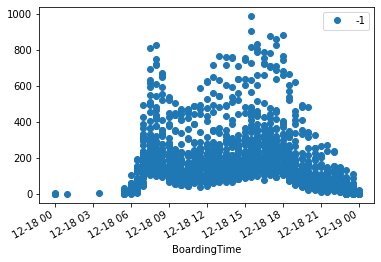

In [26]:
df2['c1'] = DBSCAN().fit_predict(dfc)
dfG3 = df2.groupby("c1")
fig, ax = plt.subplots()
for key, grp in dfG3:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
#ax.get_legend().remove()

# Changing weights

In [27]:
def time_diff2(a,date_min):
    res = (a-date_min).seconds + (a-date_min).days*86400
    return(res)
def time_diff3(a,date_min):
    res = (a-date_min).seconds/3600 + (a-date_min).days*24
    return(res)

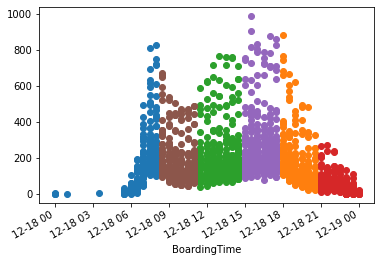

In [31]:
dfc2 = df.copy()
date_min = dfc2.BoardingTime.min()
dfc2['BoardingTime'] = df['BoardingTime'].apply(time_diff2,date_min=date_min)
le = LabelEncoder()
dfc2['Line'] = le.fit_transform(dfc['Line'])
clusters = KMeans(n_clusters=6, random_state=0).fit_predict(dfc2)
dff = df.copy()
dff['cluster'] = clusters
dfGf = dff.groupby("cluster")
fig, ax = plt.subplots()
for key, grp in dfGf:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
#plt.legend(ncol=5)
ax.get_legend().remove()

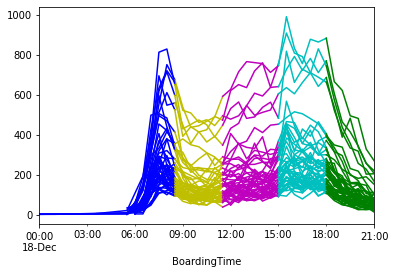

In [29]:
fig, ax = plt.subplots()
dfGf = dff.groupby("Line")
for key in keys:
    this_key = key
    this_group = dfGf.get_group(this_key).reset_index(drop=True)
    cuts = []
    for index, row in this_group.iterrows():
        cl = row['cluster']
        if len(cuts)==0:
            cuts.append(0)
            pcl = cl
            continue
        else:
            if cl!=pcl:
                cuts.append(index)
            pcl = cl
    prev = -1
    for c in cuts:
        if prev > -1:
            p = this_group[prev:c+1]
            ax = p.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount',c = cm[p.iloc[0].cluster])
            ax.get_legend().remove()
        prev = c

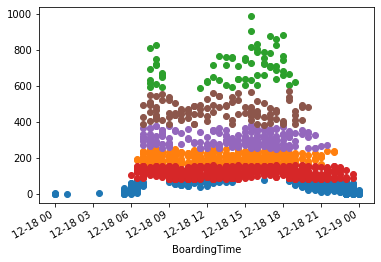

In [33]:
dfc2 = df.copy()
date_min = dfc2.BoardingTime.min()
dfc2['BoardingTime'] = df['BoardingTime'].apply(time_diff3,date_min=date_min)
le = LabelEncoder()
dfc2['Line'] = le.fit_transform(dfc['Line'])
clusters = KMeans(n_clusters=6, random_state=0).fit_predict(dfc2)
dff = df.copy()
dff['cluster'] = clusters
dfGf = dff.groupby("cluster")
fig, ax = plt.subplots()
for key, grp in dfGf:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
#plt.legend(ncol=5)
ax.get_legend().remove()

Lastly here, other time units are investigated. Firstly, the unit for time is selected as seconds, which created clusters entirely on time, with equal time difference for each cluster (nearly 3 hours). The resulting line graph is also included. Then, a time unit of hour is used. This time the clusters are observed entirely horizontally (only based on number of passenger data). Because of these two clusterings are simplifying the difference to only one feature, it can be argued that selecting minutes as the time unit is sensible. However, further investigation on time units that are multiples of 1 minute are not investigated as the obtained results seemed sufficient. 

# Gaussian Mixture Clustering

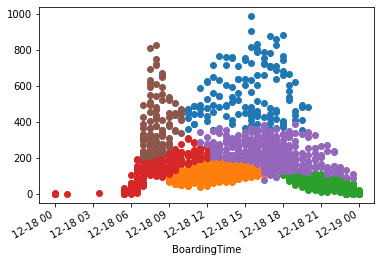

In [32]:
from sklearn.mixture import GaussianMixture
df2['c1'] = GaussianMixture(n_components=6).fit_predict(dfc)
dfG3 = df2.groupby("c1")
fig, ax = plt.subplots()
for key, grp in dfG3:
    ax = grp.plot(ax=ax, kind='line', x='BoardingTime', y='PassengerCount', label=key,marker="o", linestyle="")
ax.get_legend().remove()

resources used: <br>
https://scikit-learn.org/stable/modules/clustering.html <br>
http://jamesxli.blogspot.com/2012/03/on-mean-shift-and-k-means-clustering.html <br>
https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/